# Regresion Lineal: Costo de un incidente de Seguridad

En este caso se explican los fundamentos basicos de la regresion lineal aplicada a unn caso sencillo relacionado con la civerseguridad 

### Enunciado del Ejercicio
El ejercicio consiste en predecir el costo de un incidente de seguridad en base al numero de equipos que se ven afectados. El DataFrame es generado de manera Aleatoria

# 1.- Generacion del DataSet

In [12]:
import numpy as np

In [14]:
X=2* np.random.randn(100, 1)
Y=4+3*X + np.random.randn(100, 1)
print("La longitud del DataSet es:",len(X))


La longitud del DataSet es: 100


# 2.- Visualizacion del DataSet

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

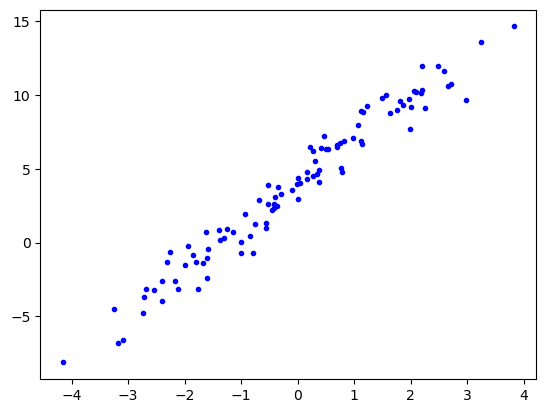

In [19]:
plt.plot(X, Y, "b.")
plt.show()

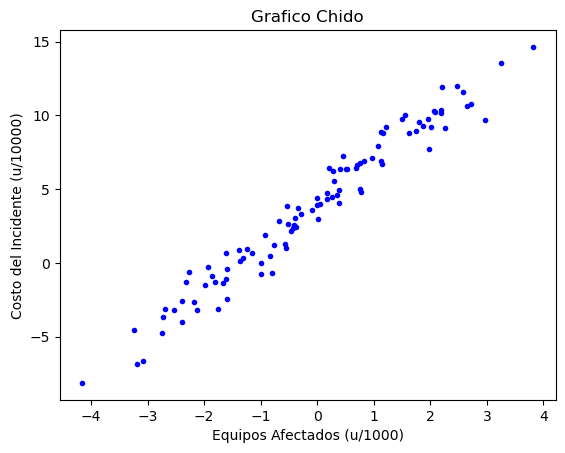

In [34]:
plt.plot( X, Y, "b.")
plt.title("Grafico Chido")
plt.xlabel("Equipos Afectados (u/1000)")
plt.ylabel("Costo del Incidente (u/10000)") #etiquetas
plt.show()

# 3.- Modificacion del DataSet

In [28]:
import pandas as pd

In [36]:
data = {"Numero de equipos Afectados":X.flatten(), 'Costo': Y.flatten()}
df=pd.DataFrame(data)
df.head(10)

,Numero de equipos Afectados,Costo
0,-0.426536,2.340626
1,-1.762617,-3.150435
2,-0.839914,0.447661
3,-1.667840,-1.353237
4,2.474478,11.966728
5,-1.245272,0.924995
6,-1.606826,-1.062397
7,0.403797,6.377456
8,1.217914,9.232918
9,2.652812,10.618430


In [44]:
# Escalado del Numero de Equipos afectados 
df['Numero de equipos Afectados']=df["Numero de equipos Afectados"] * 1000
df['Numero de equipos Afectados']=df["Numero de equipos Afectados"].astype('int')
# escalado del Costo
df['Costo']=df['Costo']*1000
df['Costo'] =df['Costo'].astype('int')
df.head(10)

,Numero de equipos Afectados,Costo
0,-426,2340
1,-1762,-3150
2,-839,447
3,-1667,-1353
4,2474,11966
5,-1245,924
6,-1606,-1062
7,403,6377
8,1217,9232
9,2652,10618


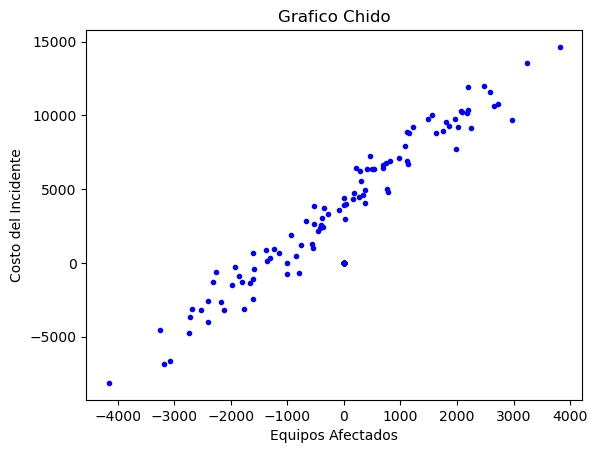

In [46]:
# representacion Grafica del DataSet
plt.plot(df["Numero de equipos Afectados"], df['Costo'], "b.")
plt.plot( X, Y, "b.")
plt.title("Grafico Chido")
plt.xlabel("Equipos Afectados")
plt.ylabel("Costo del Incidente") #etiquetas
plt.show()

# 4- Construccion del modelo 

In [48]:
from sklearn.linear_model import LinearRegression

In [53]:
# Contrucccion del modello y ajuste del modelo de la hipotesis 
lin_reg = LinearRegression()
lin_reg.fit(df["Numero de equipos Afectados"].values.reshape(-1,1), df['Costo'].values)

LinearRegression()

In [55]:
#parametro tetha 0 
lin_reg.intercept_

4000.6198098813074

In [59]:
# Paremetro tethe 1
lin_reg.coef_

array([2.91604726])

In [68]:
# prediccion para el valor minimo y maximo del DataSet 
X_min_max=np.array([[df["Numero de equipos Afectados"].min()], [df['Numero de equipos Afectados'].max()]])
Y_train_pred = lin_reg.predict(X_min_max)

###
X_min_max = np.array([[df["No_Equipos_Afectados"].min()], [df["No_Equipos_Afectados"].max()]])
y_train_pred = lin_reg.predict(X_min_max)


### NLTK Y STOPWORDS

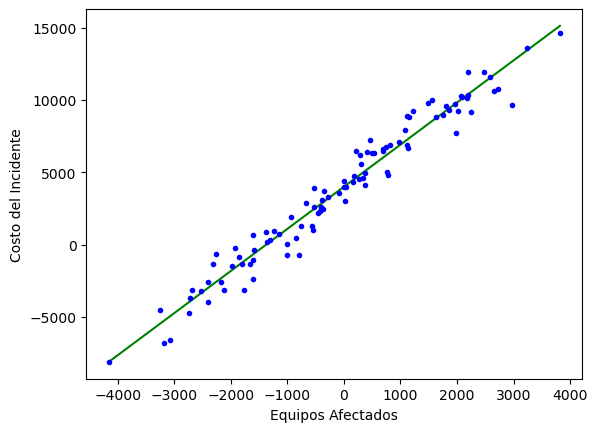

In [72]:
#representacion de la hipotesis generada
plt.plot(X_min_max, Y_train_pred, "g-")
plt.plot(df["Numero de equipos Afectados"], df['Costo'], "b.")
plt.xlabel("Equipos Afectados")
plt.ylabel("Costo del Incidente")
plt.show()

# 5.- Prediccion de Nuevos ejemplos

In [92]:
x_new = np.array([[5000]])# numero de equipos afectados. 

# Prediccion del Costo que tendria el incidente.
Costo= lin_reg.predict(x_new)

print("El costo del Incidente seria ",int(Costo[0]))


El costo del Incidente seria  18580


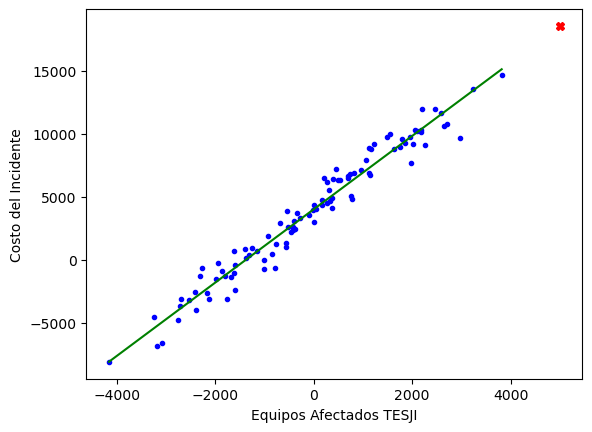

In [94]:
plt.plot(df["Numero de equipos Afectados"],df['Costo'],"b.")
plt.plot(X_min_max, Y_train_pred, "g-")
plt.plot(x_new, Costo, "rX")
plt.xlabel("Equipos Afectados TESJI")
plt.ylabel("Costo del Incidente")
plt.show()